In [ ]:
import pandas as pd
import numpy as np

from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize

# Keras
from tensorflow.keras.preprocessing.text import Tokenizer

fp = open("Sarcasm_tweets.txt", 'r')
id_tweet_map = {}
tweet_id_map = {}
count = 0
for line in fp:
  line = line.strip()
  tokens = line.split(' ')
  if len(tokens) == 1 and tokens[0] != '':
    current_id = tokens[0]
  elif len(tokens) > 1:
    id_tweet_map[current_id] = line

import string
fp = open("Sarcasm_tweet_truth.txt", 'r')
id_truth_map = {}

for line in fp:
  line = line.strip()
  if line == '':
    continue
  elif line[0] in string.digits:
    current_id = line
  else:
    id_truth_map[current_id] = line

id_tweet = pd.DataFrame(id_tweet_map.items(), columns=['tweet_id', 'tweet'])
lbl_tweet = pd.DataFrame(id_truth_map.items(), columns=['tweet_id', 'sarcasm'])
dataset = pd.merge(id_tweet, lbl_tweet, on='tweet_id')
dataset = dataset.replace({'sarcasm': {'YES': 1, 'NO': 0}})

tweet_rm=[]
for j in range(0,len(dataset)):
  tweet_rm.append(dataset['tweet'].iloc[j].replace('#sarcasm','').replace('#irony','').replace('#Irony','').replace('#Sarcasm',''))
dataset['tweet'] = tweet_rm



## Add pre-processing ##
import emoji
import re

#not needed now
FLAGS = re.MULTILINE | re.DOTALL
def emotize(text):
    t1 = emoji.replace_emoji(text,' emoji ')
    return t1
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}
def contraction_map(text):
    newstring = text
    newstring = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newstring.split(" ")])
    return "".join(str(newstring)).strip()

def text_preprocess(text, row_dict):
  dict_row = row_dict
  tknzr = WhitespaceTokenizer()
  FLAGS = re.MULTILINE | re.DOTALL
  # Different regex parts for smiley faces
  eyes = r"[8:=;]"
  nose = r"['`\-]?"
  emoticon_mapping = {
    ":)": "smile",
    ":(": "sad",
    ":D": "laugh",
    ":P": "tongue",
    ";)": "wink",
    "<3": "heart",
    ":/": "skeptical",
    ":|": "neutral",
    ":O": "surprised",
    ":*": "kiss",
    ":')": "happy tears",
    ":/": "unsure",
    ":3": "cute",
    ":'(": "crying"
    }
  slangs_mapping = {
      "RT":	"Retweet",
      "OH":	"Overheard",
      "FF":	"Follow Friday",
      "HT": "Heard Through",
      "MM":	"Music Monday",
      "DM":	"Direct Message",
      "Tweetup":	"A real life meetup announced on twitter",
      "SM":	"Social Media",
      "SB":	"Small Business",
      "ICYMI":	"In Case You Missed It",
      "MRT":	"Modified ReTweet",
      "MT":	"Modified Tweet",
      "NTS":	"Note To Self",
      "NP":	"Now Playing",
      "CC":	"Carbon Copy",
      'BFFL': 'Best friends for life'
  }

  # function so code less repetitive
  def re_sub(pattern, repl):
      return re.sub(pattern, repl, text, flags=FLAGS)
  text = emotize(text)

  def replace_emoticons(text):
    pattern = re.compile(r'(:\)|:\(|:D|:P|;\)|<3)')
    return pattern.sub(lambda match: emoticon_mapping[match.group()], text)
  text = replace_emoticons(text)

  def replace_slangs(text):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slangs_mapping.keys()) + r')\b')
    return pattern.sub(lambda x: slangs_mapping[x.group()], text)
  text = replace_slangs(text)

  text = contraction_map(text)

  if dict_row['hashtag']==1:
    text = re.sub(r'#', '', text)# segment hastags

  if dict_row['userhandles'] == 1:
    text = re_sub(r"@\w+", "user") #replace username to 'user
  else:
    text = re_sub(r"@\w+", " ") #remove username

  if dict_row['hyperlinks'] == 1:
    text = re_sub(r"r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "url")
  else:
    text = re_sub(r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", "")

  def reduce_elongated_characters(text):
    pattern = re.compile(r'(\w+)(\W)\2*')
    return pattern.sub(r'\1\2', text)
  if dict_row['elongated_chararcters']==1:
    text = reduce_elongated_characters(text)

  def reduce_elongated_words(text):
    pattern = re.compile(r'(\w)(\1{2,})(\W*)')
    return pattern.sub(r'\1\1\3', text)

  def add_intense_before_elongated_words(text):
    pattern = re.compile(r'(\b\w*(\w)\2{2,}\w*\b)')
    return pattern.sub(r'intense \1', text)
  def intense_elongated_words(text):
    text = add_intense_before_elongated_words(text)
    pattern = re.compile(r'(\w)(\1{2,})(\W*)')
    return pattern.sub(r'\1\1\3', text)

  if dict_row['replace_elongated_words'] == 0:
    text = reduce_elongated_words(text)
  else:
    text = intense_elongated_words(text)

  alphnumeric_slangs = {
    '2nite': 'Tonight',
    '4eva': 'Forever',
    'L8r': 'Later',
    'B4': 'Before',
    '2moro': 'Tomorrow',
    '2day': 'Today',
    'G2g': 'Got to go',
    'Gr8': 'Great',
    '411': 'Information or news',
    '2b': 'To be',
    '24/7': 'All the time',
    '1derful': 'Wonderful',
    '2gether': 'Together',
    '4get': 'Forget'
    }
  def replace_alpha_slangs(text):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in alphnumeric_slangs.keys()) + r')\b')
    return pattern.sub(lambda x: alphnumeric_slangs[x.group()], text)

  if row_dict['alphanumeric_slangs'] == 1:
    text = replace_alpha_slangs(text)

  def remove_punctuations(text):
    pattern = re.compile(r'[^\w\s]')
    return pattern.sub('', text)
  if row_dict['remove_punctuations'] == 1:
    text = remove_punctuations(text)

  def add_intense_to_uppercase_words(text):
    pattern = re.compile(r'\b([A-Z]+)\b')
    return pattern.sub(r'intense \1', text)
  if row_dict['capitalized_words'] == 1:
    text = add_intense_to_uppercase_words(text)

  def split_mix_case_words(text):
    processed_text = ""
    prev_char = ""
    middle_char = ""

    for char in text:
        if char.isupper() and middle_char.islower():
            processed_text += " "
        if prev_char.isupper() and middle_char.isupper() and char.islower():
            processed_text = processed_text[:-1]
            processed_text += " "
            processed_text += middle_char
        if char.isdigit() and middle_char.islower() and not middle_char.isdigit():
            processed_text += " "
        if char.isupper() and middle_char.isdigit():
            processed_text += " "
        if char.islower() and middle_char.isdigit():
            processed_text += " "
        processed_text += char
        prev_char = middle_char
        middle_char = char

    return processed_text
  if row_dict['Split_MixCase'] == 1:
    text = split_mix_case_words(text)

  def split_mix_script(text):
    pattern = re.compile(r'(?<=[a-zA-Z])(?=[^a-zA-Z])|(?<=[^a-zA-Z])(?=[a-zA-Z])')
    processed_text = pattern.sub(r' ', text)
    return processed_text
  if row_dict['Split_MixScript'] == 1:
    text = split_mix_script(text)

  def replace_recurrent_words(text):
    prev_word = ""
    more_prev_word = ""
    processed_word = ""
    words = list(text.split())
    new_words = []
    intial=0
    reccur=0
    count=0
    while intial < (len(words)-1):
      count+=1
      if count == 2000:
          break
      if intial < (len(words)-2):
          if words[intial] == words[intial + 1] == words[intial+2] and words[intial]!='user' and words[intial]!='url':
              reccur=intial
              while reccur < (len(words)-1):
                if words[intial] == words[reccur]:
                  reccur+=1
                else:
                  #print(j)
                  break
              new_words.append("intense")
              new_words.append(words[intial])
              intial=reccur
          else:
            new_words.append(words[intial])
            intial+=1
      else:
        new_words.append(words[intial])
        #new_words.append(word[intial+1])
        intial+=1

    if reccur != len(words) - 1:
      new_words.append(words[intial])
    return " ".join(new_words)

  if row_dict['recurrent_word'] == 1:
    text = replace_recurrent_words(text)

  #tokens = tknzr(text.lower())
  tokens = tknzr.tokenize(text)
  return " ".join(tokens)

row_dict={'hashtag':1,
 'userhandles':0,
 'hyperlinks':1,
 'emoji':1,
 'emoticons':1,
 'word_slangs':1,
 'expanding_contraction':1,
 'elongated_chararcters':0,
 'replace_elongated_words':1,
 'alphanumeric_slangs':1,
 'remove_punctuations':0,
 'capitalized_words':0,
 'recurrent_word':0,
 'Split_MixCase':1,
 'Split_MixScript':1,
 'misspled_words':0,
 'stopwords_removal':1}

for line in range (0,len(dataset)):
  sent = dataset['tweet'].iloc[line]
  sent = text_preprocess(sent, row_dict) #what to process
  dataset.loc[line, 'processed_tweets'] = sent

In [ ]:
dataset.head()

,tweet_id,tweet,sarcasm,processed_tweets
0,866871160725794816,Triple Talaq par Burbak Kuchh nahi bolega,0,Triple Talaq par Burbak Kuchh nahi bolega
1,880356789358743553,Batao ye uss site pr se akki sir ke verdict ni...,1,Batao ye uss site pr se akki sir ke verdict ni...
2,877751493889105920,Hindu baheno par julam bardas nahi hoga @Tripl...,0,Hindu baheno par julam bardas nahi hoga Hindu ...
3,901806457871466496,Naa bhai.. aisa nhi hai.. mere handle karne se...,0,Naa bhai .. aisa nhi hai .. mere handle karne ...
4,866264330748219392,#RememberingRajiv aaj agar musalman auraten tr...,0,Remembering Rajiv aaj agar musalman auraten tr...


In [ ]:
dataset['processed_tweets'].iloc[2]


'Hindu baheno par julam bardas nahi hoga Hindu daram par lago hoga hamari Hindu baheno ki soraksa ke liye'

In [ ]:
dataset['tweet'].iloc[2]

'Hindu baheno par julam bardas nahi hoga @TripleTalaq Hindu daram par lago hoga hamari Hindu baheno ki soraksa ke liye'

In [ ]:
!pip install tensorflow

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re

# Assuming 'dataset' is your preprocessed DataFrame

# Feature engineering: Length of the tweet in terms of words
dataset['tweet_length'] = dataset['processed_tweets'].apply(lambda x: len(x.split()))

# Feature engineering: Presence of exclamation marks
dataset['has_exclamation'] = dataset['processed_tweets'].apply(lambda x: 1 if '!' in x else 0)

# Feature engineering: Presence of question marks
dataset['has_question'] = dataset['processed_tweets'].apply(lambda x: 1 if '?' in x else 0)

# Feature engineering: Count of uppercase words
dataset['uppercase_word_count'] = dataset['processed_tweets'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

# Feature engineering: TF-IDF representation of the text
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['processed_tweets'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
dataset = pd.concat([dataset, tfidf_df], axis=1)

# Train-test split
X = dataset.drop(['tweet_id', 'tweet', 'sarcasm', 'processed_tweets'], axis=1)
y = dataset['sarcasm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.8971428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       926
           1       0.72      0.21      0.33       124

    accuracy                           0.90      1050
   macro avg       0.81      0.60      0.63      1050
weighted avg       0.88      0.90      0.87      1050



<Axes: >

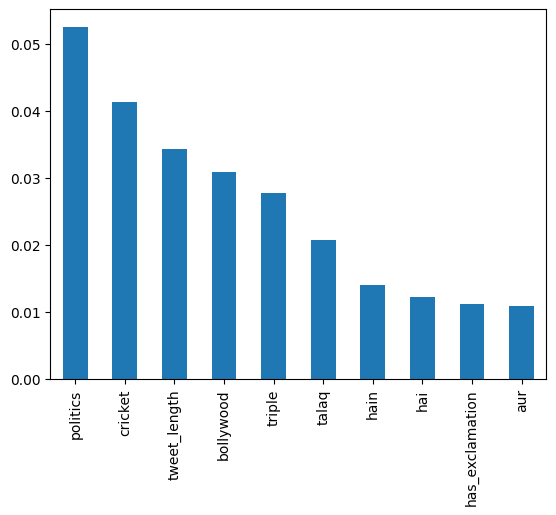

In [ ]:
# Get feature importance from the trained model
feature_importance = pd.Series(clf.feature_importances_, index=X_train.columns)
# Sort and plot feature importance
feature_importance.sort_values(ascending=False).head(10).plot(kind='bar')


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.91428571 0.92142857 0.91190476 0.92261905 0.91537545]


In [ ]:
# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


Cross-Validation Scores: [0.91428571 0.92142857 0.91190476 0.92261905 0.91537545]
Mean CV Score: 0.9171227084397525
Standard Deviation of CV Scores: 0.004173215187375261


In [35]:
# Create a DataFrame for error analysis
error_analysis_df = pd.DataFrame({'true_label': y_test, 'predicted_label': y_pred, 'text': X_test['processed_tweets']})

# Filter misclassified instances
misclassified_df = error_analysis_df[error_analysis_df['true_label'] != error_analysis_df['predicted_label']]


KeyError: 'processed_tweets'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize other classifiers
lr = LogisticRegression()
svc = SVC()

# Perform cross-validation for other classifiers
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
cv_scores_svc = cross_val_score(svc, X_train, y_train, cv=5)

# Compare mean cross-validation scores
print("Mean CV Score - Random Forest:", cv_scores.mean())
print("Mean CV Score - Logistic Regression:", cv_scores_lr.mean())
print("Mean CV Score - Support Vector Machine:", cv_scores_svc.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean CV Score - Random Forest: 0.9171227084397525
Mean CV Score - Logistic Regression: 0.9118820591407003
Mean CV Score - Support Vector Machine: 0.909502241897951


In [ ]:
# Evaluate the final model using the test set
final_model = RandomForestClassifier(**best_params_rf, random_state=42)
final_model.fit(X_train, y_train)
y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)

print("Test Set Accuracy:", accuracy_test)
print("Classification Report (Test Set):\n", classification_report_test)


Test Set Accuracy: 0.9
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       926
           1       0.79      0.21      0.33       124

    accuracy                           0.90      1050
   macro avg       0.85      0.60      0.64      1050
weighted avg       0.89      0.90      0.87      1050



In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters - Random Forest:", best_params_rf)


Best Hyperparameters - Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
def predict_sarcasm(prompt):
    # Preprocess the prompt
    processed_prompt = text_preprocess(prompt,row_dict)

    # Vectorize the prompt
    vectorized_prompt = vectorize_prompt(processed_prompt)

    # Predict sarcasm
    prediction = final_model.predict(vectorized_prompt)[0]

    return prediction




In [ ]:
def vectorize_prompt(prompt):
    # Vectorize the prompt using the same vectorizer
    vectorized_prompt = tfidf_vectorizer.transform([prompt])
    return vectorized_prompt


In [ ]:
prompts_to_test = [
    "I love waking up early on Mondays!",
    "Oh sure, because Mondays are just the best...",
    "Can't wait for another exciting Monday!",
]

for prompt in prompts_to_test:
    sarcasm_prediction = predict_sarcasm(prompt)
    if sarcasm_prediction == 1:
        print(f"The prompt '{prompt}' is sarcastic.")
    else:
        print(f"The prompt '{prompt}' is not sarcastic.")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1000 features, but RandomForestClassifier is expecting 1003 features as input.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1000 features, but RandomForestClassifier is expecting 1003 features as input.

In [41]:
def preprocess_prompt(prompt):
    # Perform the same preprocessing steps as done for the training data
    processed_prompt = prompt.replace('#sarcasm', '').replace('#irony', '').replace('#Irony', '').replace('#Sarcasm', '')
    return processed_prompt

def vectorize_prompt(prompt):
    # Vectorize the prompt using the same TF-IDF vectorizer used for training
    vectorized_prompt = tfidf_vectorizer.transform([prompt])
    return vectorized_prompt

def predict_sarcasm(prompt):
    # Preprocess the prompt
    processed_prompt = preprocess_prompt(prompt)

    # Vectorize the prompt
    vectorized_prompt = vectorize_prompt(processed_prompt)

    # Predict sarcasm
    prediction = final_model.predict(vectorized_prompt)[0]

    return prediction

# Prompts to test
prompts_to_test = [
    "I love waking up early on Mondays!",
    "Oh sure, because Mondays are just the best...",
    "Can't wait for another exciting Monday!",
]

for prompt in prompts_to_test:
    sarcasm_prediction = predict_sarcasm(prompt)
    if sarcasm_prediction == 1:
        print(f"The prompt '{prompt}' is sarcastic.")
    else:
        print(f"The prompt '{prompt}' is not sarcastic.")


ValueError: X has 1000 features, but RandomForestClassifier is expecting 1003 features as input.

In [52]:
def predict_sarcasm(prompt, vectorizer, model):
    # Preprocess the prompt
    processed_prompt = text_preprocess(prompt, row_dict)

    # Vectorize the prompt using the provided vectorizer
    vectorized_prompt = vectorizer.transform([processed_prompt])

    # Predict sarcasm
    prediction = model.predict(vectorized_prompt)[0]

    return prediction

# Example usage
prompts_to_test = [
   "Naa bhai.. aisa nhi hai.. mere handle karne se...",
]

# Initialize the TF-IDF vectorizer with the same configuration used during training
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# Fit the vectorizer on the preprocessed tweets
tfidf_vectorizer.fit(dataset['processed_tweets'])



TfidfVectorizer(max_features=1000, stop_words='english')

In [43]:
# Print vectorizer configuration
print("Vectorizer Configuration:")
print("Max Features:", tfidf_vectorizer.max_features)
print("Stop Words:", tfidf_vectorizer.stop_words)


Vectorizer Configuration:
Max Features: 1000
Stop Words: english


In [50]:
processed_prompt = text_preprocess(prompt, row_dict)
print("Preprocessed Prompt:", processed_prompt)


Preprocessed Prompt: I love waking up early on Mondays !


In [53]:
for prompt in prompts_to_test:
    sarcasm_prediction = predict_sarcasm(prompt, tfidf_vectorizer, final_model)
    if sarcasm_prediction == 1:
        print(f"The prompt '{prompt}' is sarcastic.")
    else:
        print(f"The prompt '{prompt}' is not sarcastic.")


ValueError: X has 1000 features, but RandomForestClassifier is expecting 1003 features as input.

In [51]:
print("Feature Names:", tfidf_vectorizer.get_feature_names_out())

Feature Names: ['10' '100' '11' '15' '17' '20' '2017' '2019' '25' '30' '50' '70' '72'
 'aa' 'aadmi' 'aage' 'aaj' 'aajkal' 'aam' 'aamir' 'aana' 'aane' 'aankh'
 'aao' 'aap' 'aapke' 'aapki' 'aapko' 'aapne' 'aata' 'aate' 'aati' 'aaya'
 'aaye' 'aayi' 'aazadi' 'ab' 'abe' 'abey' 'abhi' 'accha' 'acchi' 'acha'
 'ache' 'achha' 'achi' 'actor' 'admi' 'afridi' 'agar' 'agr' 'ahmed' 'aik'
 'aisa' 'aise' 'aisi' 'aj' 'akhilesh' 'akki' 'akmal' 'akshay' 'alag'
 'alawa' 'allah' 'aman' 'andar' 'anti' 'ap' 'apke' 'apko' 'apna' 'apne'
 'apni' 'app' 'appeasement' 'arey' 'army' 'asli' 'astha' 'ata' 'ati'
 'aulad' 'aur' 'aurat' 'aus' 'australia' 'awam' 'award' 'aya' 'aye'
 'ayega' 'azadi' 'azam' 'ba' 'baad' 'baaki' 'baap' 'baar' 'baare' 'baat'
 'baba' 'bacche' 'baccho' 'bacha' 'bachane' 'bachao' 'bachche' 'bachcho'
 'bache' 'bachho' 'bacho' 'bad' 'bada' 'badal' 'bade' 'badh' 'badhai'
 'badi' 'bahar' 'bahot' 'bahut' 'baithe' 'baki' 'ban' 'bana' 'banane'
 'banao' 'banate' 'banaya' 'band' 'bandh' 'bane' 'bank' 'ba